Nesse projeto vamos desenvolver um modelo para prever se um cliente deixará o banco Beta Bank em breve. Temos os dados sobre o comportamento passado dos clientes e rescisões de contratos com o banco. Meu primeiro passo foi importar todas as bibliotecas necessárias.

In [38]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from joblib import dump
import numpy as np
from collections import Counter
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_auc_score
from sklearn.utils import shuffle
from sklearn.metrics import roc_curve
from sklearn.preprocessing import OrdinalEncoder 
from sklearn.metrics import accuracy_score

Nos próximos códigos realizei a análise dos dados da tabela 'Churn'. Abri o arquivo usando pd.read_csv.

In [39]:
df = pd.read_csv('/datasets/Churn.csv')

Resumo da tabela:

In [40]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3.0,75075.31,2,1,0,92888.52,1


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [42]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


Estudando as principais informações da tabela, nota-se que ela possui valores nulos na coluna Tenure. Para corrigir isso, escolhi substituir esses valores faltantes pela mediana da coluna. As variáveis estão nos formatos certos.  

In [43]:
df_tenure_isna = df[df['Tenure'].isna()]
df_tenure_isna

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
30,31,15589475,Azikiwe,591,Spain,Female,39,NaN,0.00,3,1,0,140469.38,1
48,49,15766205,Yin,550,Germany,Male,38,NaN,103391.38,1,0,1,90878.13,0
51,52,15768193,Trevisani,585,Germany,Male,36,NaN,146050.97,2,0,0,86424.57,0
53,54,15702298,Parkhill,655,Germany,Male,41,NaN,125561.97,1,0,0,164040.94,1
60,61,15651280,Hunter,742,Germany,Male,35,NaN,136857.00,1,0,0,84509.57,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9944,9945,15703923,Cameron,744,Germany,Male,41,NaN,190409.34,2,1,1,138361.48,0
9956,9957,15707861,Nucci,520,France,Female,46,NaN,85216.61,1,1,0,117369.52,1
9964,9965,15642785,Douglas,479,France,Male,34,NaN,117593.48,2,0,0,113308.29,0
9985,9986,15586914,Nepean,659,France,Male,36,NaN,123841.49,2,1,0,96833.00,0


In [44]:
df['Tenure'].median()

5.0

In [45]:
df.loc[df['Tenure'].isna(),'Tenure'] = df['Tenure'].median()


Nos códigos acima substitui os valores nulos da coluna Tenure pela mediana. Abaixo a tabela sem valores nulos. 

In [46]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3.0,75075.31,2,1,0,92888.52,1


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [48]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.99790,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.76001,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.00000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.00000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.00000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.00000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.00000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


Meu proximo passo foi transformar características categóricas em características numéricas. Para isso usei a Códificação de Rótulos, por ser mais indicada para  árvores de decisão e florestas aleatórias.

In [49]:
encoder = OrdinalEncoder() 
encoder.fit(df) 
data_ordinal = encoder.transform(df) 
data_ordinal = pd.DataFrame(encoder.transform(df),columns=df.columns)

In [50]:
data_ordinal

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0.0,2736.0,1115.0,228.0,0.0,0.0,24.0,2.0,0.0,0.0,1.0,1.0,5068.0,1.0
1,1.0,3258.0,1177.0,217.0,2.0,0.0,23.0,1.0,743.0,0.0,0.0,1.0,5639.0,0.0
2,2.0,2104.0,2040.0,111.0,0.0,0.0,24.0,8.0,5793.0,2.0,1.0,0.0,5707.0,1.0
3,3.0,5435.0,289.0,308.0,0.0,0.0,21.0,1.0,0.0,1.0,0.0,0.0,4704.0,0.0
4,4.0,6899.0,1822.0,459.0,2.0,0.0,25.0,2.0,3696.0,0.0,1.0,1.0,3925.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995.0,1599.0,1999.0,380.0,0.0,1.0,21.0,5.0,0.0,1.0,1.0,0.0,4827.0,0.0
9996,9996.0,161.0,1336.0,125.0,0.0,1.0,17.0,10.0,124.0,0.0,1.0,1.0,5087.0,0.0
9997,9997.0,717.0,1570.0,318.0,0.0,0.0,18.0,7.0,0.0,0.0,0.0,1.0,2062.0,1.0
9998,9998.0,4656.0,2345.0,381.0,1.0,1.0,24.0,3.0,427.0,1.0,1.0,0.0,4639.0,1.0


In [51]:
df['Geography'] = data_ordinal['Geography']
df['Gender'] = data_ordinal['Gender']


Abaixo a tabela com as colunas com características categóricas transformadas em características numéricas.

In [52]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,0.0,0.0,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,2.0,0.0,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,0.0,0.0,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,0.0,0.0,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,2.0,0.0,43,2.0,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,0.0,1.0,39,5.0,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,0.0,1.0,35,10.0,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,0.0,0.0,36,7.0,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,1.0,1.0,42,3.0,75075.31,2,1,0,92888.52,1


Aqui examinei o equilíbrio das classes. Quase 80% das observações são de clientes que ainda estão no banco. 

In [53]:
df['Exited'].value_counts(normalize=True)

0    0.7963
1    0.2037
Name: Exited, dtype: float64

In [54]:
saiu = df['Exited'].sum()/len(df['Exited'])*100
não_saiu = (len(df['Exited'])-df['Exited'].sum())/len(df['Exited'])*100
print('Participação Saiu:',round(saiu,1),'%') 
print('Participação Não Saiu:',round(não_saiu,1),'%') 

Participação Saiu: 20.4 %
Participação Não Saiu: 79.6 %


Gráfico mostrando a distribuição na classe:

<AxesSubplot:>

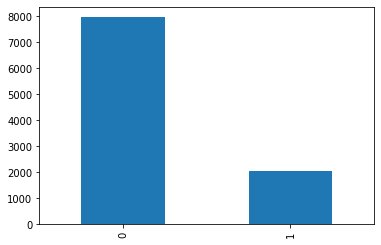

In [55]:
df['Exited'].value_counts().plot(kind='bar')

Dividi a tabela em target (objetivo) e features (características). Target representa a coluna 'Exited' e features as outras com exceção das colunas:'RowNumber','CustomerId','Surname'. Essas colunas não acrescentariam nenhuma informação relevante ao modelo.  

In [56]:
target = df['Exited']
features = df.drop(['Exited','RowNumber','CustomerId','Surname'], axis=1)

In [57]:
target

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [58]:
features

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0.0,0.0,42,2.0,0.00,1,1,1,101348.88
1,608,2.0,0.0,41,1.0,83807.86,1,0,1,112542.58
2,502,0.0,0.0,42,8.0,159660.80,3,1,0,113931.57
3,699,0.0,0.0,39,1.0,0.00,2,0,0,93826.63
4,850,2.0,0.0,43,2.0,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,0.0,1.0,39,5.0,0.00,2,1,0,96270.64
9996,516,0.0,1.0,35,10.0,57369.61,1,1,1,101699.77
9997,709,0.0,0.0,36,7.0,0.00,1,0,1,42085.58
9998,772,1.0,1.0,42,3.0,75075.31,2,1,0,92888.52


Para nosso modelo funcionar precisamos ter além de um conjunto para treinar o modelo, um conjunto para validar e depois testá-lo. Por isso, nos próximos códigos dividi os dados da seguinte forma: 60% conjunto de teste, 20% conjunto de validação e 20% conjunto de teste.

In [59]:
features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.2, random_state=12345
)

In [60]:
features_train, features_test, target_train, target_test = train_test_split(
    features_train, target_train, test_size=0.25, random_state=12345
)

Nos próximos códigos eu padronizei as caracteristcas: 'CreditScore', 'Age', Tenure','Balance','NumOfProducts','EstimatedSalary'. Transformei os dados das características do conjunto teste, validação e treinamento. Com isso, todas as características serão consideradas igualmente importantes na execução do algoritmo e a magnitude dos valores e a dispersão não impactarão no modelo.  

In [61]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,0.0,0.0,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,2.0,0.0,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,0.0,0.0,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,0.0,0.0,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,2.0,0.0,43,2.0,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,0.0,1.0,39,5.0,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,0.0,1.0,35,10.0,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,0.0,0.0,36,7.0,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,1.0,1.0,42,3.0,75075.31,2,1,0,92888.52,1


In [62]:
var_numeric = ['CreditScore', 'Age', 'Tenure','Balance','NumOfProducts','EstimatedSalary']


In [63]:
scaler = StandardScaler()

features_train[var_numeric] = scaler.fit_transform(features_train[var_numeric])
features_test[var_numeric] = scaler.fit_transform(features_test[var_numeric])
features_valid[var_numeric] = scaler.fit_transform(features_valid[var_numeric])




/tmp/ipykernel_75/2925549948.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_valid[var_numeric] = scaler.fit_transform(features_valid[var_numeric])
/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


In [64]:
features_valid

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
7867,-0.098906,2.0,0.0,0.666349,-0.698222,-1.249297,-0.960757,1,1,0.998766
1402,1.119395,0.0,1.0,-0.973479,1.100856,0.846511,-0.960757,1,0,-0.384906
8606,1.640037,2.0,1.0,0.280507,0.021409,-1.249297,0.794051,1,1,-0.430012
8885,0.192653,2.0,1.0,0.569888,-0.338407,0.399059,0.794051,1,1,1.035982
6494,0.515451,0.0,1.0,-1.069939,0.741040,-1.249297,0.794051,1,1,-1.346998
...,...,...,...,...,...,...,...,...,...,...
2563,2.014899,0.0,0.0,-1.166400,0.021409,-1.249297,0.794051,1,1,-0.560083
1167,-1.056887,0.0,0.0,-0.394716,1.820487,-1.249297,-0.960757,1,1,-1.195708
1009,0.005222,2.0,1.0,3.077860,-1.777669,-1.249297,-0.960757,1,1,1.334552
1002,0.786185,1.0,1.0,-0.008874,-1.417853,-0.430943,0.794051,1,1,1.486331


In [65]:
features_train

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
492,-0.134048,0.0,0.0,-0.078068,-0.369113,0.076163,0.816929,0,1,0.331571
6655,-1.010798,0.0,1.0,0.494555,-0.007415,0.136391,-0.896909,1,1,-0.727858
4287,0.639554,1.0,1.0,1.353490,-1.454209,0.358435,-0.896909,1,1,-0.477006
42,-0.990168,0.0,0.0,2.116987,-1.092511,0.651725,-0.896909,1,1,-0.100232
8178,0.567351,0.0,0.0,0.685430,0.715982,0.813110,0.816929,1,1,0.801922
...,...,...,...,...,...,...,...,...,...,...
8819,-0.618839,1.0,1.0,-0.268942,1.801078,0.744283,-0.896909,0,1,0.803658
1537,1.743227,0.0,0.0,-1.032439,1.077681,-1.232442,-0.896909,1,1,-1.098797
1408,0.567351,0.0,1.0,-0.650691,1.439380,-1.232442,0.816929,0,0,-1.202257
7661,-0.412545,1.0,1.0,0.494555,-1.092511,0.615524,-0.896909,1,1,-0.038931


In [66]:
features_valid

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
7867,-0.098906,2.0,0.0,0.666349,-0.698222,-1.249297,-0.960757,1,1,0.998766
1402,1.119395,0.0,1.0,-0.973479,1.100856,0.846511,-0.960757,1,0,-0.384906
8606,1.640037,2.0,1.0,0.280507,0.021409,-1.249297,0.794051,1,1,-0.430012
8885,0.192653,2.0,1.0,0.569888,-0.338407,0.399059,0.794051,1,1,1.035982
6494,0.515451,0.0,1.0,-1.069939,0.741040,-1.249297,0.794051,1,1,-1.346998
...,...,...,...,...,...,...,...,...,...,...
2563,2.014899,0.0,0.0,-1.166400,0.021409,-1.249297,0.794051,1,1,-0.560083
1167,-1.056887,0.0,0.0,-0.394716,1.820487,-1.249297,-0.960757,1,1,-1.195708
1009,0.005222,2.0,1.0,3.077860,-1.777669,-1.249297,-0.960757,1,1,1.334552
1002,0.786185,1.0,1.0,-0.008874,-1.417853,-0.430943,0.794051,1,1,1.486331


Aqui trouxe um exemplo da matriz de confusão no modelo de Arvore de Decisão: 

In [67]:
model = DecisionTreeClassifier(random_state=12345)
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
confusion_matrix(target_valid,predicted_valid)

array([[1360,  213],
       [ 223,  204]])

A partir daqui comecei a treinar modelos sem levar em conta o desequilíbrio de classe. Minha busca são por modelos com F1 superior a 0,59, conforme solicitado no enunciado do projeto.  

1.1 Regressão logistica:

In [68]:
model_log = LogisticRegression(random_state=54321, solver='liblinear')
model_log.fit(features_train,target_train)
log_predicted_valid = model_log.predict(features_valid)
f1_log = f1_score(target_valid,log_predicted_valid)
f1_log
print("O F1 do modelo de regressão logística no conjunto de validação é:", f1_log)

O F1 do modelo de regressão logística no conjunto de validação é: 0.2568807339449541


Os valores f1 ficaram muito baixos, assim segui na tentativa de outro modelo. 

2.1 Árvore de Decisão

In [69]:
best_f1_tree = 0
best_depth_tree_f1 = 0
for i in range(1, 10): 
    model_tree = DecisionTreeClassifier(random_state=12345,max_depth=i) 
    model_tree.fit(features_train,target_train)
    tree_predicted_valid = model_tree.predict(features_valid)
    f1_tree = f1_score(target_valid,tree_predicted_valid)
    if f1_tree > best_f1_tree:
        best_f1_tree = f1_tree 
        best_depth_tree_f1 = i 

print("O F1 do melhor modelo de Árvore de Decisão no conjunto de validação (max_depth = {}): {}".format(best_depth_tree_f1, best_f1_tree))

O F1 do melhor modelo de Árvore de Decisão no conjunto de validação (max_depth = 8): 0.5354558610709117


O valore f1 não se aproximou de 0,59, por isso segui na tentativa de outro modelo. 

3.1 Floresta Aleatória

In [70]:
best_f1_randforest = 0
best_est_randforest = 0
for est2 in range(1, 30): 
    model_randforest = RandomForestClassifier(random_state=54321, n_estimators=est2) 
    model_randforest.fit(features_train,target_train)
    randforest_predicted_valid = model_randforest.predict(features_valid)
    f1_randforest = f1_score(target_valid,randforest_predicted_valid)
    if f1_randforest > best_f1_randforest:
        best_f1_randforest = f1_randforest 
        best_est_randforest = est2 

print("O F1 do melhor modelo no conjunto de validação (n_estimators = {}): {}".format(best_est_randforest, best_f1_randforest))

O F1 do melhor modelo no conjunto de validação (n_estimators = 29): 0.5573294629898404


Os valores F1 seguem baixos. Para melhorar o modelo, comecei algumas abordagens para corrigir o desequilíbrio de classe. 

Ponderando Classes


Primeira abordagem foi ponderar as classes.

1. Regressão logistica:

In [71]:
model_log_bal = LogisticRegression(random_state=54321, class_weight='balanced', solver='liblinear') 
model_log_bal.fit(features_train ,target_train) 
log_predicted_valid_bal = model_log_bal.predict(features_valid)
f1_log_bal = f1_score(target_valid,log_predicted_valid_bal)
print('F1 Regressão Logistica Ponderadas Igualmente:',f1_log_bal)

F1 Regressão Logistica Ponderadas Igualmente: 0.47966101694915253


Mesmo ponderando o F1 ficou baixo.

2. Árvore de Decisão 

In [72]:
best_f1_tree = 0
best_depth_tree_f1 = 0
for i in range(1, 10): 
    model_tree = DecisionTreeClassifier(random_state=12345,class_weight='balanced',max_depth=i) 
    model_tree.fit(features_train,target_train)
    tree_predicted_valid = model_tree.predict(features_valid)
    f1_tree = f1_score(target_valid,tree_predicted_valid)
    if f1_tree > best_f1_tree:
        best_f1_tree = f1_tree 
        best_depth_tree_f1 = i 

print("O F1 do melhor modelo Árvore de decisão Ponderadas Igualmente com escalabilidade no conjunto de validação (max_depth = {}): {}".format(best_depth_tree_f1, round((best_f1_tree),4)))

O F1 do melhor modelo Árvore de decisão Ponderadas Igualmente com escalabilidade no conjunto de validação (max_depth = 6): 0.5903


O F1 do modelo no conjunto de validação ultrapassou o 0,59. Abaixo testei o modelo com o conjunto de teste. 

In [73]:
model_tree_test = DecisionTreeClassifier(random_state=12345,class_weight='balanced',max_depth=best_depth_tree_f1)
model_tree_test.fit(features_train,target_train)
tree_predicted_test = model_tree_test.predict(features_test)
f1_tree_test = f1_score(target_test,tree_predicted_test)
f1_tree_test

0.566410537870472

Novamente o F1 no conjunto de teste ficou abaixo do requerido.

3.1 Floresta Aleatória

In [74]:
best_f1_randforest = 0
best_est_randforest = 0
for est2 in range(1, 30): 
    model_randforest = RandomForestClassifier(random_state=54321, class_weight='balanced', n_estimators=est2) 
    model_randforest.fit(features_train ,target_train)
    randforest_predicted_valid = model_randforest.predict(features_valid)
    f1_randforest = f1_score(target_valid,randforest_predicted_valid)
    if f1_randforest > best_f1_randforest:
        best_f1_randforest = f1_randforest 
        best_est_randforest = est2 

print("O F1 do melhor modelo Floresta Aleatória Ponderadas Igualmente no conjunto de validação (n_estimators = {}): {}".format(best_est_randforest, round(best_f1_randforest,4)))

O F1 do melhor modelo Floresta Aleatória Ponderadas Igualmente no conjunto de validação (n_estimators = 23): 0.5403


O F1 no conjunto de validação ficou abaixo de 0,59.

Como não chegamos ao resultado desejado, segui para uma outra abordagem. Para tornar menos raras as observações de uma classe rara, usei a técnica da Superamostragem. Abaixo defini a função para a implementação da técnica:   

In [75]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)

    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345
    )

    return features_upsampled, target_upsampled

In [76]:
features_upsampled, target_upsampled = upsample(features_train , target_train, 8)

Mais uma vez testei os 3 tipos de modelos.

1. Regressão logistica:

In [77]:
model_log_up = LogisticRegression(random_state=12345, solver='liblinear')
model_log_up.fit(features_upsampled, target_upsampled)
log_up_predicted_valid = model_log_up.predict(features_valid)

print('F1 Regressão Logistica com Superamostragem:', f1_score(target_valid, log_up_predicted_valid))

F1 Regressão Logistica com Superamostragem: 0.44508670520231214


F1 abaixo de 0,59.

2.2 Árvore de Decisão 

In [78]:
best_f1_tree_up = 0
best_depth_tree_f1_up = 0
for i in range(1, 10): 
    model_tree_up = DecisionTreeClassifier(random_state=12345,max_depth=i) 
    model_tree_up.fit(features_upsampled, target_upsampled)
    tree_up_predicted_valid = model_tree_up.predict(features_valid)
    f1_tree_up = f1_score(target_valid,tree_up_predicted_valid)
    if f1_tree_up > best_f1_tree_up:
        best_f1_tree_up = f1_tree_up 
        best_depth_tree_f1_up = i 

print("O F1 do melhor modelo Árvore de decisão com Superamostragem no conjunto de validação (max_depth = {}): {}".format(best_depth_tree_f1_up, round(best_f1_tree_up,4)))

O F1 do melhor modelo Árvore de decisão com Superamostragem no conjunto de validação (max_depth = 2): 0.5243


O F1 do modelo no conjunto de validação ultrapassou o 0,59. Abaixo testei o modelo com o conjunto de teste.

In [79]:
model_tree_up = DecisionTreeClassifier(random_state=12345,max_depth=best_depth_tree_f1_up) 
model_tree_up.fit(features_upsampled, target_upsampled)
tree_up_predicted_test = model_tree_up.predict(features_test)
f1_tree_up_test = f1_score(target_test,tree_up_predicted_test)
f1_tree_up_test


0.4852282900626679

Entretanto, o F1 no conjunto de teste ficou abaixo do requerido.

3.1 Floresta Aleatória

In [80]:
best_f1_randforest_up = 0
best_est_randforest_up = 0

for est2 in range(1, 40):  
    model_randforest_up = RandomForestClassifier(random_state=54321, n_estimators=est2) 
    model_randforest_up.fit(features_upsampled, target_upsampled)
    randforest_up_predicted_valid = model_randforest_up.predict(features_valid)
    f1_randforest_up = f1_score(target_valid,randforest_up_predicted_valid)
    if f1_randforest_up > best_f1_randforest_up:
        best_f1_randforest_up = f1_randforest_up 
        best_est_randforest_up = est2 
        

print("O F1 do melhor modelo Árvore de decisão com Superamostragem no conjunto de validação (n_estimators = {}): {}".format(best_est_randforest_up, round(best_f1_randforest_up,4)))


O F1 do melhor modelo Árvore de decisão com Superamostragem no conjunto de validação (n_estimators = 17): 0.5905


O F1 do modelo no conjunto de validação ultrapassou o 0,59. Abaixo testei o modelo com o conjunto de teste.

In [81]:
best_f1_randforest_up_test = 0
best_est_randforest_up_test = 0

for est2 in range(1, 20):  
    model_randforest_up = RandomForestClassifier(random_state=54321, n_estimators=est2) 
    model_randforest_up.fit(features_upsampled, target_upsampled)
    randforest_up_predicted_test = model_randforest_up.predict(features_test)
    f1_randforest_up = f1_score(target_test,randforest_up_predicted_test)
    if f1_randforest_up > best_f1_randforest_up_test:
        best_f1_randforest_up_test = f1_randforest_up 
        best_est_randforest_up_test = est2 
        
print("O F1 do melhor modelo Árvore de decisão com Superamostragem no conjunto de teste (n_estimators = {}): {}".format(best_est_randforest_up_test, round(best_f1_randforest_up_test,4)))


O F1 do melhor modelo Árvore de decisão com Superamostragem no conjunto de teste (n_estimators = 9): 0.601


In [82]:
model_randforest_up_valid = RandomForestClassifier(random_state=54321, n_estimators=best_est_randforest_up_test) 
model_randforest_up_valid.fit(features_upsampled, target_upsampled)
model_randforest_predicted_valid = model_randforest_up_valid.predict(features_valid)
f1_randforest_valid = f1_score(target_valid,model_randforest_predicted_valid)
f1_randforest_valid

0.5761006289308177

In [83]:
model_randforest_up_test = RandomForestClassifier(random_state=54321, n_estimators=best_est_randforest_up_test) 
model_randforest_up_test.fit(features_upsampled, target_upsampled)
model_randforest_predicted_test = model_randforest_up_test.predict(features_test)
f1_randforest_test = f1_score(target_test,model_randforest_predicted_test)
f1_randforest_test

0.6010498687664041

O F1 no conjunto de teste desse modelo ficou acima de 0,59. Esse será o modelo escolhido para as futuras análises. 

Mesmo chegando ao resultado desejado, segui para a abordagem da Subamostragem. Com o objetivo de tornar menos frequentes as observações de uma classe frequente Abaixo defini a função para a implementação da técnica:

In [84]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)]
        + [features_ones]
    )
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)]
        + [target_ones]
    )

    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345
    )

    return features_downsampled, target_downsampled

In [85]:
features_downsampled, target_downsampled = downsample(features_train, target_train, 0.3)

1. Regressão logistica:

In [86]:
model_log_down = LogisticRegression(random_state=12345, solver='liblinear')
model_log_down.fit(features_downsampled, target_downsampled)
predicted_valid_log_down = model_log_down.predict(features_valid)
f1_log_down = f1_score(target_valid, predicted_valid_log_down)
print('F1 Regressão Logistica com Subamostragem:', f1_log_down)

F1 Regressão Logistica com Subamostragem: 0.49126034958601655


F1 abaixo de 0,59.

In [87]:
best_f1_tree_down = 0
best_depth_tree_f1_down = 0
for i in range(1, 10): 
    model_tree_down = DecisionTreeClassifier(random_state=12345,class_weight='balanced',max_depth=i) 
    model_tree_down.fit(features_downsampled, target_downsampled)
    tree_predicted_valid_down = model_tree_down.predict(features_valid)
    f1_tree_down = f1_score(target_valid,tree_predicted_valid_down)
    if f1_tree_down > best_f1_tree_down:
        best_f1_tree_down = f1_tree_down 
        best_depth_tree_f1_down = i 

print("O F1 do melhor modelo Árvore de decisão com Subamostragem no conjunto de validação (max_depth = {}): {}".format(best_depth_tree_f1_down, round(best_f1_tree_down,4)))

O F1 do melhor modelo Árvore de decisão com Subamostragem no conjunto de validação (max_depth = 6): 0.5868


O F1 do modelo no conjunto de validação ultrapassou o 0,59. Abaixo testei o modelo com o conjunto de teste.

In [88]:
model_tree_down_test = DecisionTreeClassifier(random_state=12345,max_depth=best_depth_tree_f1_down)
model_tree_down_test.fit(features_downsampled, target_downsampled)
tree_predicted_test_down = model_tree_down_test.predict(features_test)
f1_tree_down_test = f1_score(target_test,tree_predicted_test_down)
f1_tree_down_test

0.555191256830601

Entretanto, o F1 no conjunto de teste ficou abaixo do requerido.

In [89]:
best_f1_randforest_down = 0
best_est_randforest_down = 0
for est2 in range(1, 60): 
    model_randforest_down = RandomForestClassifier(random_state=54321, n_estimators=est2) 
    model_randforest_down.fit(features_downsampled, target_downsampled)
    randfores_predicted_valid_down = model_randforest_down.predict(features_valid)
    f1_randfores_down = f1_score(target_valid,randfores_predicted_valid_down)
    if f1_randfores_down > best_f1_randforest_down:
        best_f1_randforest_down = f1_randfores_down 
        best_est_randforest_down = est2 

print("O F1 do melhor modelo Floresta Aleatória com Subamostragem no conjunto de validação (n_estimators = {}): {}".format(best_est_randforest_down, round(best_f1_randforest_down,4)))

O F1 do melhor modelo Floresta Aleatória com Subamostragem no conjunto de validação (n_estimators = 58): 0.6066


O F1 do modelo no conjunto de validação ultrapassou o 0,59. Abaixo testei o modelo com o conjunto de teste.

In [90]:
model_randforest_down_test = RandomForestClassifier(random_state=54321, n_estimators=best_est_randforest_down) 
model_randforest_down_test.fit(features_downsampled, target_downsampled)
randfores_predicted_test_down = model_randforest_down_test.predict(features_test)
f1_randfores_down_test = f1_score(target_test,randfores_predicted_test_down) 
f1_randfores_down_test

0.5627615062761505

Porém, o F1 no conjunto de teste ficou abaixo do requerido.

Após muitos testes escolhi o modelo de Floresta Aleatória com Superamostragem para examinar o AUC-ROC

In [91]:
model_randforest_up_test = RandomForestClassifier(random_state=54321, n_estimators=best_est_randforest_up_test) 
model_randforest_up_test.fit(features_upsampled, target_upsampled)
model_randforest_predicted_test = model_randforest_up_test.predict(features_test)
f1_randforest_test = f1_score(target_test,model_randforest_predicted_test)
f1_randforest_test

0.6010498687664041

Abaixo gerei a curva ROC, onde confronto os valores Taxa de positivos falsos (TPF) e Taxa de positivos verdadeiros (TPV).

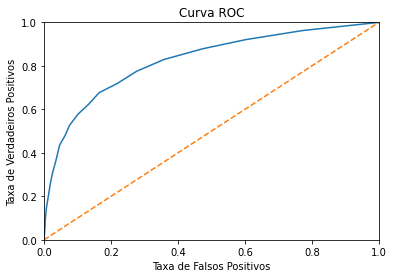

In [92]:
probabilities_valid = model_randforest_up.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)  
plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.show()

In [93]:
auc_roc = roc_auc_score(target_valid,probabilities_one_valid)
print('O AUC-ROC do modelo com melhor F1 no conjunto de validação é igual a:',round(auc_roc,4))

O AUC-ROC do modelo com melhor F1 no conjunto de validação é igual a: 0.8245


In [94]:
probabilities_test = model_randforest_up.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
auc_roc = roc_auc_score(target_test,probabilities_one_test)
print('O AUC-ROC do modelo com melhor F1 no conjunto de teste é igual a:',round(auc_roc,4))

O AUC-ROC do modelo com melhor F1 no conjunto de teste é igual a: 0.8367


Por fim, os valores de AUC-ROC do melhor modelo ficaram próximos de 0,85. Esse resultado é melhor que o modelo aleatório (AUC-ROC = 0,5), mas ainda está longe de ser perfeito (AUC-ROC = 1,0).

In [95]:
saiu = model_randforest_predicted_test.sum()/len(model_randforest_predicted_test)*100
não_saiu = (len(model_randforest_predicted_test)-model_randforest_predicted_test.sum())/len(model_randforest_predicted_test)*100
print('Participação Saiu:',round(saiu,1),'%') 
print('Participação Não Saiu:',round(não_saiu,1),'%') 

Participação Saiu: 18.6 %
Participação Não Saiu: 81.4 %


In [96]:
saiu = randforest_up_predicted_valid.sum()/len(randforest_up_predicted_valid)*100
não_saiu = (len(randforest_up_predicted_valid)-randforest_up_predicted_valid.sum())/len(randforest_up_predicted_valid)*100
print('Participação Saiu:',round(saiu,1),'%') 
print('Participação Não Saiu:',round(não_saiu,1),'%') 

Participação Saiu: 16.7 %
Participação Não Saiu: 83.4 %


A participação dos clientes que saíram ou não do banco, tanto no conjunto de teste quanto no de validação nas previsões do modelo escolhido, ficou bem próxima a encontrada no conjunto de dados original. 

In [97]:
accuracy_randforest = accuracy_score(target_valid,randforest_up_predicted_valid)
print("A acurácia do melhor modelo no conjunto de validação é:",accuracy_randforest)
accuracy_randforest_test = accuracy_score(target_test,model_randforest_predicted_test)
print("A acurácia do melhor modelo no conjunto de teste é:",accuracy_randforest_test)

A acurácia do melhor modelo no conjunto de validação é: 0.841
A acurácia do melhor modelo no conjunto de teste é: 0.848


Após todas essas análises escolhi o modelo de Floresta Aleatória com Superamostragem para prever se um cliente deixará o banco de acordo com as outras características apresentadas. Esse modelo teve o maior F1 no conjunto de validação e teste, manteve próxima a distribuição de classes, possui um AUC-ROC superior ao modelo aleatório e acurácia de aproximadamente 85%.     